Привет Дамир :) Меня зовут Семенюк Артём, я буду проверять твой проект. Предлагаю общаться на "ты",
если так не очень комфортно, то перейдём на "Вы". 
Несколько слов о ревью. Оно может содержать 3 типа комментариев, различающихся цветом:

<div class="alert alert-success">
✅Зелёный: хорошие решения и верные выводы, которые могут быть применены в будущем, интересные подходы
</div>


<div class="alert alert-warning">
⚠️Жёлтый: не критические замечания тех моментов, которые можно реализовать по-другому или оптимировать (исправлять их сейчас не обязательно, но стоит прокомментировать) 
</div>


<div class="alert alert-danger">
❌Красный: аспекты заданий,фтребующие твоего непосредственного внимания (при их исправлении
проект будет принят)
</div>


Предлагаю работать над проектом в диалоге. Если что-то меняешь в проекте следуя моим рекомендациям, то
выделяй, пожалуйста, свои комментарии, отличным от моих цветом. И так же большая просьба
не изменять и не удалять мои комментарии. Так будет проще отслеживать изменения в проекте
и это ускорит повторную проверку :)

# Приоритизация гипотез и Анализ А/В-теста

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

Я провёл A/B-тест и получил результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

**Задача**

Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

**Цель:** Принять решение по результатам теста и объясните его. 
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

## Импортирование библиотек и загрузка данных
<a id='section_id'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import math
import copy

In [2]:
# форматирую вывод графиков
sns.set(rc={'figure.figsize':(10, 4)})
#xticks(rotation=15)
pd.options.display.max_colwidth = 100

In [3]:
# Чтение исходных данных
hypothesis, orders_data, visitors = (
    pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),
    pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'),
)

### Обзор данных
<a id='section_id1'></a>

#### `hypothesis`

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датафрейме находятся 9 гипотез с характеристиками для применения фреймворков `ICE` и `RICE`

#### `orders`

In [6]:
orders_data.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders_data.tail(5)

,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [8]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders_data.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


#### `visitors`

In [10]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.tail(5)

,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице `hypothesis` находятся 9 гипотез, значения целочисленные, подходят для вычислений

В таблицах `orders` и `visitors` необходимо изменить формат данных в колонках `date` с object на datetime. В датафрейме `orders` приведу названия колонок к нижнему регистру.

Для исследования отмечу, что в датафрейме заказов значения выручки сильно разнятся, есть откровенные выбросы, которые будут искажать результаты анализа.
В остальном всё в порядке.

### Предобработка данных
<a id='section_id2'></a>

In [13]:
orders_data['date'] = pd.to_datetime(orders_data['date'])
orders_data.columns = orders_data.columns.str.lower()

visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
print('Количество явных дубуликатов в orders:', orders_data.duplicated().sum())
print('Количество явных дубуликатов в visitors:', orders_data.duplicated().sum())

Количество явных дубуликатов в orders: 0
Количество явных дубуликатов в visitors: 0


In [17]:
# Количество пользователей в датафрейме orders:
print('Количество уникальных пользователей: ', orders_data['visitorid'].nunique())
print('Количество строк: ', orders_data['visitorid'].count())
print('')
print('Количество пользователей по группам:')
orders_data['group'].value_counts()

Количество уникальных пользователей:  1031
Количество строк:  1197

Количество пользователей по группам:


B    640
A    557
Name: group, dtype: int64

Всего в дф 1197 строк, при том, что количество уникальных пользователей - 1031. Значит есть дублирование по пользователям. 
Возможно есть пользователи, оформившие больше 1 заказа, но также посмотрю, есть ли пользователи, попавшие в обе группы.
Если такие есть, посмотрю на их количество относительно первоначального распределения и приму решение, нужно ли исключить их для проведения чистого эксперимента.

In [18]:
orders_group_a = copy.deepcopy(orders_data[orders_data['group'] == 'A'])
orders_group_b = copy.deepcopy(orders_data[orders_data['group'] == 'B'])
print('Число пользователей группы А, попавших в группу B:', 
      orders_group_a['visitorid'].loc[orders_group_a['visitorid'].isin(orders_group_b['visitorid'])].count())
print('Число пользователей группы B, попавших в группу A:', 
      orders_group_b['visitorid'].loc[orders_group_b['visitorid'].isin(orders_group_a['visitorid'])].count())

print('Доля пересекающихся элементов от общего числа записей:', 
      (orders_group_a['visitorid'].loc[orders_group_a['visitorid'].isin(orders_group_b['visitorid'])].nunique())
      / orders_data['visitorid'].nunique() * 100
)

Число пользователей группы А, попавших в группу B: 89
Число пользователей группы B, попавших в группу A: 92
Доля пересекающихся элементов от общего числа записей: 5.625606207565471


Количество пересекающихся пользователей по группам составляет ~ 5% от общего количества строк. Так как по своей сути, пересекающиеся элементы нарушают проведение теста, то будет лучше удалить их и пожертвовать частью данных.

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера 2:</b> Более точнее считать именно уникальных пользоваталей, т.к. с помощью count мы смотрим общее число событий, а пользователеь, мог совершить несколько заказ. Также расчёт доли пользователей не совсем точный. Стоит посчитать кол-во пользователей, попавших в обе группы и разделить это значение на общее число пользователей. Процент будет не таким большим </div>

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
<b>Изменения:</b> Согласен <br></div> 

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 3:</b> Теперь всё отлично :)
</div>

In [19]:
# Исключаю пересекающихся пользователей из двух датафреймов: 
orders_group_a_unique = orders_group_a.loc[~orders_group_a['visitorid'].isin(orders_group_b['visitorid'])]
orders_group_b_unique = orders_group_b.loc[~orders_group_b['visitorid'].isin(orders_group_a['visitorid'])]

#Собираю два датафрейма в один:
orders = pd.concat((orders_group_a_unique, orders_group_b_unique), axis=0)
print('Количество пользователей по группам:')
orders['group'].value_counts()

Количество пользователей по группам:


B    548
A    468
Name: group, dtype: int64

In [20]:
# Проверю совпадают ли периоды тестирования по группам
print('Дата старта теста, группа А:', orders[orders['group'] == 'A']['date'].min())
print('Дата завершения теста, группа А:', orders[orders['group'] == 'A']['date'].max())
print('Дата старта теста, группа B:', orders[orders['group'] == 'B']['date'].min())
print('Дата завершения теста, группа B:', orders[orders['group'] == 'B']['date'].max())

Дата старта теста, группа А: 2019-08-01 00:00:00
Дата завершения теста, группа А: 2019-08-31 00:00:00
Дата старта теста, группа B: 2019-08-01 00:00:00
Дата завершения теста, группа B: 2019-08-31 00:00:00


**Вывод:**
Данные готовы для последующего анализа.

## Приоритизация гипотез
<a id='section_id3'></a>

Задача:
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [21]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Чтобы вывести назания гипотез целиком, рекомендую воспользоваться вот такой настройкой:
    
    pd.options.display.max_colwidth = 100
  
:)
</div>

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
<b>Изменения:</b> Удобно, спасибо, поправил <br></div> 

In [22]:
# Расчитаю приоритизацию фреймворков:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

### ICE фреймфорк

In [23]:
hypothesis_ice = copy.deepcopy(hypothesis)
# Выведу гипотезы в порядке убывания по фреймворку ICE
hypothesis_ice[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### RICE фреймфорк

In [24]:
hypothesis_rice = copy.deepcopy(hypothesis)
# Выведу гипотезы в порядке убывания по фреймворку RICE
hypothesis_rice[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [25]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


**Вывод:**

Разница в приоритизации гипотез по двум фреймворкам заключается в параметре Reach или охват пользователей. В фреймворке Reach гипотеза с добавлением формы подписки охватывает максимальное количество пользователей, так как данный параметр находится в числителе фреймворка, то он выводит в лидеры гипотезу.
В фреймворке ICE данный показатель не участвует, поэтому побеждает гипотеза с запуском акции со скидкой в день рождения. Отмечу, что из-за низкого охвата, согласно расчёту RICE данная гипотеза лишь на 5 месте.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё здорово :)
</div>

## Анализ A/B-теста
<a id='section_id4'></a>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера:</b> Здесь хорошо бы добавить небольшое описание задач, которые будут решаться и чем они могут быть полезны бизнесу</div>

**Анализ датафреймов**

### График кумулятивной выручки по группам. 
<a id='section_id5'></a>
Сделайте выводы и предположения.

<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера:</b> Перед сбором кумулятивных данных, стоит ещё раз оценить иходные таблицы. Посмотреть сколько всего групп, сколько пользователей в каждой из них, сколько всего пользователей. Есть ли пересекающаяся аудитория, если такие пользователи есть, то оценить их кол-во и будут ли ои влиять на результаты. Также можно постреть начало и конец периода, чтобы быть уверенным, что рассматривается один период для всех групп (это можно добавить в блок с предобработкой)
</div>

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
<b>Изменения:</b> Добавил в предобработку <br></div> 

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 2:</b> Всё здорово :)
</div>

Для построения графиков кумулятивной выручки по группам соберу данные в нужном виде.

In [26]:
# создаю массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаю агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[
    np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].\
    agg({'date':'max', 'group':'max', 'transactionid':'nunique', 'visitorid':'nunique', 'revenue':'sum'}), axis=1).\
    sort_values(by=['date','group'])

# получаю агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[
    np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
    agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяю кумулятивные данные в одной таблице и присваиваю ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# Выведу полученные данные:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


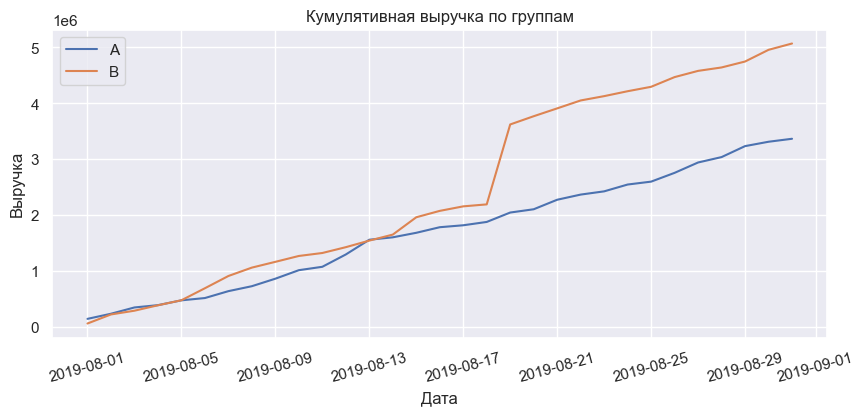

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=15)
plt.show()

**Вывод:**

Выручка почти равномерно увеличивается в течение всего теста. Это не может не радовать.
Однако график  выручки группы B в моменте резко растёт. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё верно, скачок характеризуется наличием крупных заказов :)
</div>
<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера:</b> Стоит немного преобразовать график, а именно: добавить заголовок, подписи осей, также даты немного сливаются, их можно немного повернуть (касается и графиков ниже)
</div>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера 2:</b> Всё отлично, но стоит добавить ещё заголовок к графику</div>

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
Добавил
    <br></div> 

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 3:</b> Графики отличные :)
</div>

### График кумулятивного среднего чека по группам. 

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

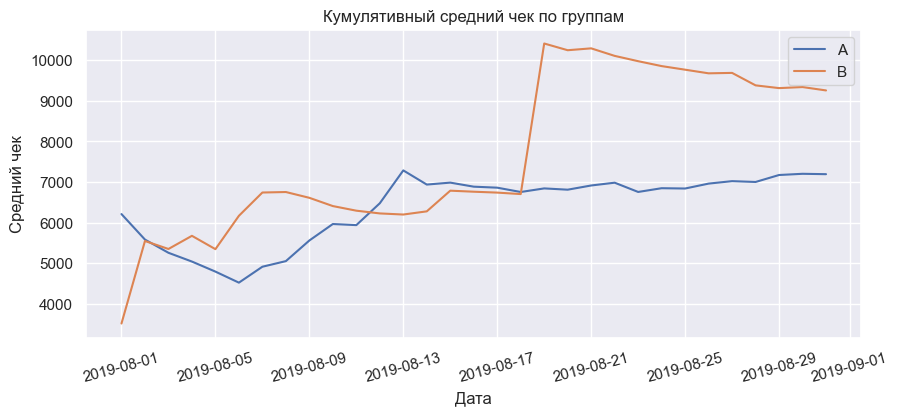

In [28]:
# Построю графики среднего чека по группам:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=15)
plt.show()

**Вывод:**

Средние чеки выравниваются к середине теста, но затем чеки из группы B сильно вырастают. Вероятно дело в аномально дорогих покупках.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Верный вывод :)
</div>

### График относительного изменения кумулятивного среднего чека группы B к группе A

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

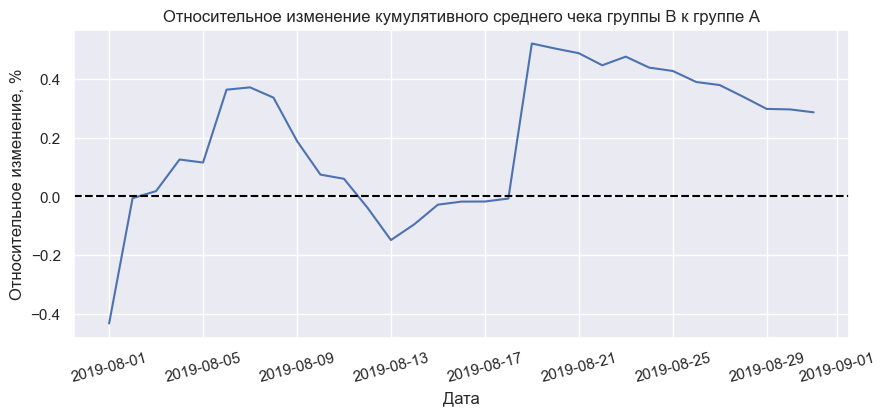

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение, %')
plt.xticks(rotation=15)
plt.show()

**Вывод:**

График подтверждает предыдущие наблюдения, в середние теста есть аномальный всплеск в группе B. 

### График кумулятивной конверсии по группам

Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

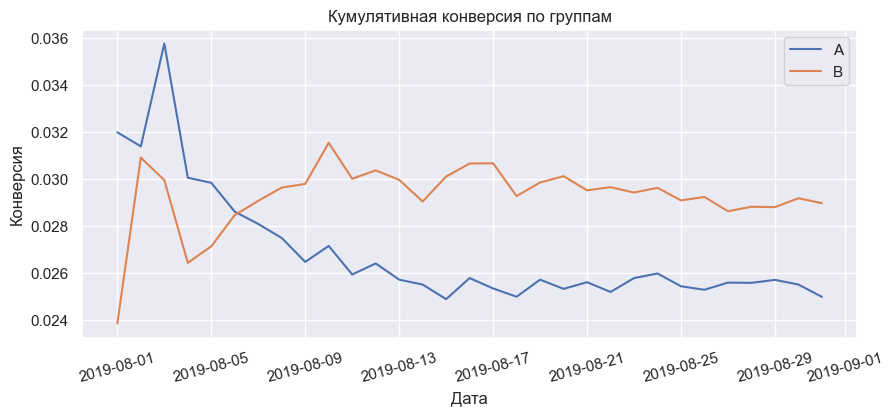

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=15)
plt.show()

**Вывод:**

После пика у обоих групп А-конверсия колеблется в диапазоне от 0.029 до 0.031. В-конверсия - от 0.033 и до 0,036. B-конверсия на сырых данных выглядит лучше.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Конверсия В стабильно выше конверсии А :)
</div>

### График относительного изменения кумулятивной конверсии группы B к группе A

Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

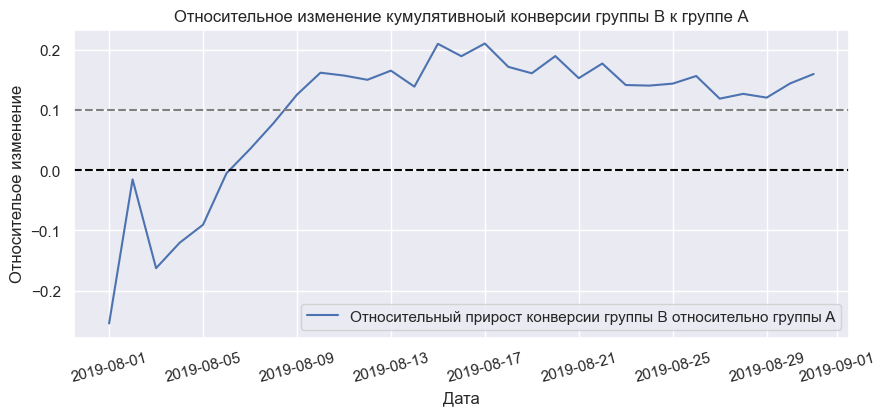

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
    merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивноый конверсии группы В к группе А')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительое изменение')
plt.xticks(rotation=15)
plt.show()

**Вывод:**

После провала вначале тестирования, конверсия группы В лучше конверсии группы А на наблюдаемом отрезке, в середине также есть аномальный всплеск.

### Точечный график количества заказов по пользователям

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

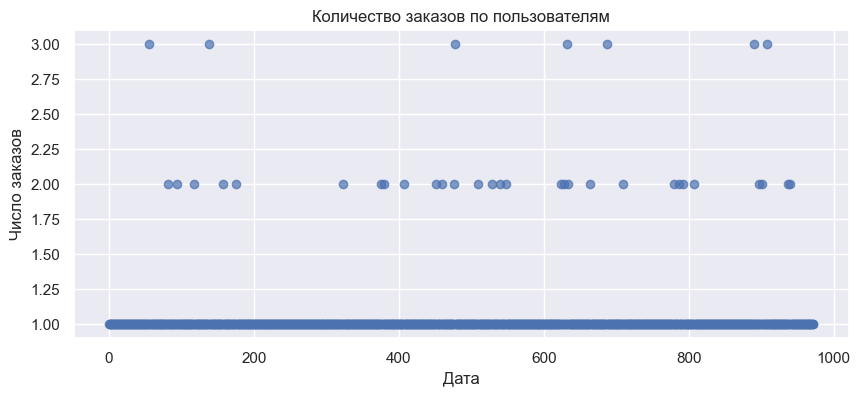

In [32]:
# Посчитаю количество заказов по пользователям:
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'})
ordersByUsers.columns = ['userid', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.7)
plt.title('Количество заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

**Вывод:**

В основном покупают 1 раз, но есть относительно немного заядлых пользователей, сделавших больше 2 заказов

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера 2:</b> После удаления пересекающихся пользователей, график изменился. Стоит поправить вывод (касается и всех выводов ниже)</div>

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 3:</b> Отлично, теперь вывод соответствует графику :)
</div>

### Перцентили количества заказов на пользователя

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [33]:
print('95 перцентиль числа заказов на пользователя: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль числа заказов на пользователя: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

95 перцентиль числа заказов на пользователя: 1.00
99 перцентиль числа заказов на пользователя: 2.00


**Вывод:**

Не более 5% пользователей оформляли больше 1 заказа и не более 1% - более 2 заказов. Разумно выбрать 1 заказ на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Хорошее решение в качестве границы взять 95 перцентиль :)
</div>

### Точечный график стоимостей заказов

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

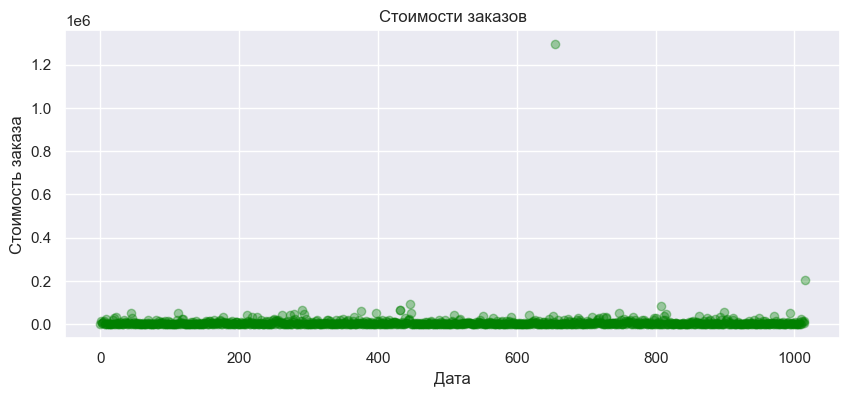

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'], color='green', alpha = 0.35)
plt.title('Стоимости заказов')
plt.xlabel('Дата')
plt.ylabel('Стоимость заказа')
plt.show()

**Вывод:**

На графике отчётливо видны два выброса, которые вызвали рост кумулятивной выручки.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Для большей наглядности распределения можно построить график без учёта 2х явных выбросов :)
</div>

### Перцентили стоимости заказов

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [35]:
print('95 перцентиль стоимости заказов: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль стоимости заказов: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль стоимости заказов: 26785.00
99 перцентиль стоимости заказов: 53904.00


In [36]:
# Посмотрю на распределение сумм выручки:
orders[['revenue']].describe()

,revenue
count,1.016000e+03
mean,8.300815e+03
std,4.212199e+04
min,5.000000e+01
25%,1.190000e+03
50%,2.955000e+03
75%,8.134250e+03
max,1.294500e+06


**Вывод:**

В последующих пунктах уберу пользователей по количеству заказов больше 2, отсеку 5% с наибольшим количеством заказов, дополнительно убрав пользователей с выручкой выше 99 перцентиля, отсеятся от 1% до 5% пользователей.

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера:</b> Всё здорово :)
</div>

### Статистическая значимость различий в конверсии между группами по «сырым» данным
<a id='section_id6'></a>
Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Воспользуюсь критерием Манна-Уитни
* H0: Конверсия в группе A **равна** конверсии в группе B
* H1: Конверсия в группе A **не равна** конверсии в группе B

In [37]:
# Подготовлю датафрейм для расчёта конверсии по дням:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединю датафреймы и посчитаю конверсию по дням:
conversionDaily = ordersAggregated.\
    merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
conversionDaily.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
conversionDaily['conversion'] = (conversionDaily['orders'] / conversionDaily['visitors'])
conversionDaily['visitorsPerDateA'] = conversionDaily[conversionDaily['group'] == 'A']['visitors']
conversionDaily['visitorsPerDateB'] = conversionDaily[conversionDaily['group'] == 'B']['visitors']

conversionDaily['visitorsPerDateA'] = conversionDaily['visitorsPerDateA'].fillna(0)
conversionDaily['visitorsPerDateB'] = conversionDaily['visitorsPerDateB'].fillna(0)
conversionDaily.head(2)

,date,group,orders,buyers,revenue,visitors,conversion,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,A,23,19,142779,719,0.031989,719.0,0.0
1,2019-08-01,B,17,17,59758,713,0.023843,0.0,713.0


In [38]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0, index=np.arange(conversionDaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,index=np.arange(conversionDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.010
0.166


**Вывод:**

По «сырым» данным статистически значимые различия в конверсиях групп А и B есть. Первое число — p-value = 0.01 меньше 0.05. Значит отверагем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Однако относительный проигрыш группы B равен 16.6% — второе число в выводе.

<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера:</b> Здесь тоже стоит воспользоваться Манном-Уитни. В условии задания конверсия подразумевает за собой немного другое. Здесь нужно сгруппировать по user_id и посчитать кол-во заказов на каждого пользователя в каждой из групп, добавив 0 тем, кто ничего не заказал (по аналогии с тренажером, если не ошибаюсь) 
</div>

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
Я окончательно запуался в этом пункте. В слаке также по нему много вопросов было у ребят. Но как-то непонятно к чему в итоге нужно прийти. Плюс не понял, почему, если 12 задание, аналогичное этому, как я понял - ок, то тут надо через Манна-Уитни считать?
    <br></div> 

<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера 2:</b> Критерий Манна-Уитни нужно использовать для того, чтобы можно было понять стали ли пользователи в среднем делать больше или меньше покупок. С помощью z-критерия можно оценить только равенство/различие конверсий  
</div>

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
Вроде поправил
    <br></div> 

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 3:</b> Расчёты корректны :)
</div>

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Воспользуюсь критерием Манна-Уитни
* H0: Средний чек A **не превосходит** средний чек группы B
* H1: Средний чек A **превосходит** средний чек группы B

In [39]:
# критический уровень статистической значимости
alpha = 0.05

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                          orders[orders['group']=='B']['revenue'])

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение: 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


<div class="alert alert-block alert-danger">❌ <b>Комментарий ревьюера:</b> Здесь ошибка: name 'pvalue' is not defined
</div>

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
<b>Изменения:</b> Исправил <br></div> 

<div class="alert alert-block alert-success">✅ <b>Комментарий ревьюера 2:</b> Всё верно :)
</div>

In [40]:
# Дополнительно посмотрю на величины средних чеков по группам по сырым данным: 
print('Средний чек по группе А:', orders[orders['group']=='A']['revenue'].mean())
print('Средний чек по группе B:', orders[orders['group']=='B']['revenue'].mean())

Средний чек по группе А: 7189.4358974358975
Средний чек по группе B: 9249.94890510949


**Вывод:**

По сырым данным не получилось отвергнуть нулевую гипотезу - средний чек группы А статистически значимо не отличается от среднего чека группы B.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [41]:
# Оставлю в сгруппированном датафрейме пользователей с количеством заказов меньше 2:
ordersByUsers_normal = copy.deepcopy(ordersByUsers[ordersByUsers['orders'] < 2])
# Оставшихся пользователей найду в датафрейме orders и уберу лишних
orders_clean = copy.deepcopy(orders[orders['visitorid'].isin(ordersByUsers_normal['userid'])])
# Также уберу заказы со стоимостью заказа больше или равно 53904:  
orders_clean = orders_clean[orders_clean['revenue'] < 53904]
orders_clean

# Посчитаю конверсию очищенным данным по группам:
conversion_clean = (orders_clean.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion_clean['conversion'] = conversion_clean['orders'] / conversion_clean['visitors']
conversion_clean

,group,orders,visitors,conversion
0,A,420,18736,0.022417
1,B,505,18916,0.026697


Воспользуюсь Z-критерием для сравнения разности двух долей.
* H0: Конверсия в группе A **равна** конверсии в группе B
* H1: Конверсия в группе A **не равна** конверсии в группе B

In [42]:
# критический уровень статистической значимости
alpha=0.05
purchases = np.array(conversion_clean['orders'])
leads = np.array(conversion_clean['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]

# считаю статистику в ст.отклонениях стандартного нормального распределения
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / leads[0] + 1 / leads[1]))

# задаю стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение:', p_value)
if (p_value < alpha):
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными')

p-значение: 0.007305831339946778
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:**

Конверсия группы B по-прежнему превышает конверсию А со статистической значимостью.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Воспользуюсь критерием Манна-Уитни
* H0: Средний чек A **не превосходит** средний чек группы B
* H1: Средний чек A **превосходит** средний чек группы B

In [43]:
# критический уровень статистической значимости
alpha = 0.05
results = st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], 
                          orders_clean[orders_clean['group']=='B']['revenue'])

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение: 0.972689879549994
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [44]:
# Дополнительно посмотрю на величины средних чеков по группам по очищенным данным: 
print('Средний чек по группе А:', orders_clean[orders_clean['group']=='A']['revenue'].mean())
print('Средний чек по группе B:', orders_clean[orders_clean['group']=='B']['revenue'].mean())

Средний чек по группе А: 6145.652380952381
Средний чек по группе B: 6293.124752475247


**Вывод:**

По очищенным данным средний чек группы А статистически значимо не отличается от среднего чека группы B.

### Результаты теста

Примите решение по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Вывод:**

Предлагается остановить тест и зафиксировать победу группы В

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера:</b> Можешь, пожалуйста, уточнить, о каких графиках идёт речь? Также в вывод стоит добвавить все результаты по данному блоку заданий</div>

<div class="alert alert-block alert-warning"> ⚠️ <b>Комментарий ревьюера 2:</b> А если графики так и не нормализуются, что тогда можно предположить? В целом за месячный период есть хорошие результаты групп по конверсии, и по среднему чеку</div>

**Ссылки на разделы в тетрадке:**

1. [Импортирование библиотек](#section_id)

* [Обзор данных](#section_id1)

* [Предобработка данных](#section_id2)

2. [Приоритизация гипотез](#section_id3)

3. [Анализ A/B-теста](#section_id4)

* [Графики](#section_id5)

* [Статистическая значимость](#section_id6)

<div class="alert alert-block alert-danger"> <b>Итоги ревью:</b> Хороший проект. Проделана качественная работа. Отдельно отмечу структуру и оформление. Но, к сожалению, есть несколько замечаний, требующие корректировок и уточнений. Желаю успехов и жду работу на повторное ревью :)
</div>
<div class="alert alert-block alert-danger"> <b>Итоги ревью 2:</b> Проект преобразился. Но ещё осталось несколько вопросов, требующих уточнений. Желаю успехов :)
</div>

<div class="alert alert-block alert-success"> <b>Итоги ревью 3:</b> Проект принят. Все критические замечания исправлены корректно. Желаю успехов в будущих исследованиях  :)
</div>